In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings

from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)



In [2]:
df = pd.read_csv('~/New_York.csv', header=4, skipfooter=3)
df.head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,4,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,5,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,6,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,7,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,8,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [3]:
df.columns = ['List', 'City', 'Population', 'Violent crime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Assault', 'Property crime', 'Burglary', 'Larceny', 'Car theft', 'Arson']

In [4]:
df.head()

,List,City,Population,Violent crime,Murder,Rape1,Rape2,Robbery,Assault,Property crime,Burglary,Larceny,Car theft,Arson
0,4,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,5,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,6,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,7,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,8,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [5]:
NY = pd.DataFrame(df)

In [6]:
NY.isnull().sum()

List                0
City                0
Population          0
Violent crime       0
Murder              0
Rape1             348
Rape2               0
Robbery             0
Assault             0
Property crime      0
Burglary            0
Larceny             0
Car theft           0
Arson             161
dtype: int64

In [7]:
NY.shape

(348, 14)

In [8]:
NY = NY.drop("Rape1",axis=1)

In [9]:
NY = NY.drop("Arson",axis=1)

In [10]:
#Remove New York City from the data - NYC is an outlier
NY = NY[NY.City != "New York"]

**Creating dummy variables for Murder and Robbery**

In [11]:
NY['Murder1'] = np.where(NY['Murder'] > 0, 1,0)

In [12]:
NY['Robbery1'] = np.where(NY['Robbery'] >0, 1, 0)

**Transforming population into population squared**

In [13]:
NY['Population2'] = (NY['Population'])^2 

In [14]:
#Replace 0s with a small number
NY = NY.replace(0, 0.00001)

**Evaluation histograms of population**

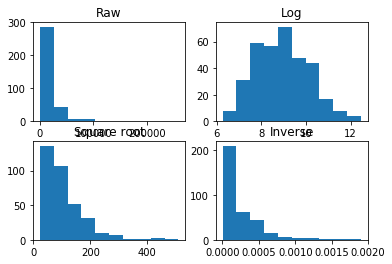

In [15]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(NY['Population'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(NY['Population']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(NY['Population']))
plt.title('Square root')
         
fig.add_subplot(224)
plt.hist(1/NY['Population'])
plt.title('Inverse')
         
plt.show()




In [16]:
NY['Log_Population'] = (np.log(NY['Population']))
NY['Sqrt_Population'] = (np.sqrt(NY['Population']))
NY['Inverse_Population'] = (1/NY['Population'])

**Evaluating histograms of population squared**

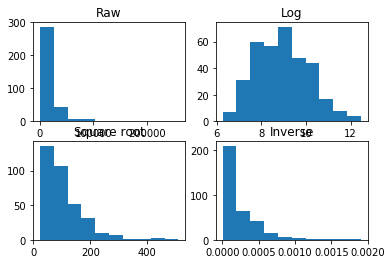

In [17]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(NY['Population2'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(NY['Population2']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(NY['Population2']))
plt.title('Square root')
         
fig.add_subplot(224)
plt.hist(1/NY['Population2'])
plt.title('Inverse')
         
plt.show()

In [18]:
NY['Log_Population2'] = (np.log(NY['Population2']))
NY['Sqrt_Population2'] = (np.sqrt(NY['Population2']))
NY['Inverse_Population2'] = (1/NY['Population2'])

## Shapiro test for 'Population'

In [19]:
print(scipy.stats.shapiro(NY['Population']))
print(scipy.stats.shapiro(np.sqrt(NY['Population'])))
print(scipy.stats.shapiro(np.log(NY['Population'])))
print(scipy.stats.shapiro(1/NY['Population']))

(0.5105308294296265, 7.350959377160963e-30)
(0.8205825090408325, 2.378172178435628e-19)
(0.9889013767242432, 0.009643996134400368)
(0.7455079555511475, 9.78108699492405e-23)


**Population log is the most robust**

## Shapiro test for 'Population 2'

In [20]:
print(scipy.stats.shapiro(NY['Population2']))
print(scipy.stats.shapiro(np.sqrt(NY['Population2'])))
print(scipy.stats.shapiro(np.log(NY['Population2'])))
print(scipy.stats.shapiro(1/NY['Population2']))

(0.5105323791503906, 7.351597341455041e-30)
(0.8205920457839966, 2.38085586253548e-19)
(0.9889208674430847, 0.009751972742378712)
(0.7451249361038208, 9.444695247921188e-23)


**Population2 log is the most robust**

## Checking correlations

In [21]:
NY._get_numeric_data().corr()

,List,Population,Violent crime,Murder,Rape2,Robbery,Assault,Property crime,Burglary,Larceny,Car theft,Murder1,Robbery1,Population2,Log_Population,Sqrt_Population,Inverse_Population,Log_Population2,Sqrt_Population2,Inverse_Population2
List,1.000,0.047,0.022,0.032,0.019,0.016,0.025,0.017,0.021,0.015,0.021,0.126,0.035,0.047,0.072,0.066,-0.054,0.072,0.066,-0.054
Population,0.047,1.000,0.829,0.756,0.797,0.816,0.835,0.887,0.820,0.901,0.828,0.503,0.344,1.000,0.736,0.928,-0.380,0.736,0.928,-0.380
Violent crime,0.022,0.829,1.000,0.955,0.962,0.994,0.997,0.944,0.971,0.913,0.987,0.406,0.168,0.829,0.418,0.641,-0.165,0.418,0.641,-0.165
Murder,0.032,0.756,0.955,1.000,0.946,0.963,0.938,0.917,0.956,0.881,0.959,0.408,0.132,0.756,0.354,0.566,-0.131,0.354,0.566,-0.131
Rape2,0.019,0.797,0.962,0.946,1.000,0.949,0.958,0.949,0.974,0.921,0.960,0.403,0.189,0.797,0.424,0.628,-0.182,0.424,0.628,-0.182
Robbery,0.016,0.816,0.994,0.963,0.949,1.000,0.983,0.933,0.964,0.898,0.989,0.378,0.154,0.816,0.394,0.619,-0.150,0.394,0.619,-0.150
Assault,0.025,0.835,0.997,0.938,0.958,0.983,1.000,0.942,0.964,0.913,0.977,0.422,0.176,0.835,0.432,0.653,-0.174,0.432,0.653,-0.174
Property crime,0.017,0.887,0.944,0.917,0.949,0.933,0.942,1.000,0.977,0.995,0.949,0.443,0.267,0.887,0.550,0.755,-0.257,0.550,0.755,-0.257
Burglary,0.021,0.820,0.971,0.956,0.974,0.964,0.964,0.977,1.000,0.950,0.976,0.402,0.197,0.820,0.449,0.656,-0.194,0.449,0.656,-0.193
Larceny,0.015,0.901,0.913,0.881,0.921,0.898,0.913,0.995,0.950,1.000,0.916,0.458,0.297,0.901,0.590,0.788,-0.284,0.590,0.788,-0.284


## Model

In [22]:
X = NY[['Population', 'Population2','Murder1', 'Robbery1']] 
y = NY['Property crime']

In [23]:
import statsmodels.api as sm

In [24]:
est = sm.OLS(y, X) 
estres = est.fit() 
print(estres.summary()) 
ypred = estres.predict(X) 
print(ypred)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     367.9
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          1.19e-122
Time:                        09:36:57   Log-Likelihood:                -2634.2
No. Observations:                 347   AIC:                             5276.
Df Residuals:                     343   BIC:                             5292.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Population      0.5127     12.953      0.040      

**all p-values except for Robbery 1 are over the .05 threshold** 

## Model with log

In [25]:
X_1 = NY[['Log_Population', 'Log_Population2','Murder1', 'Robbery1']] 
y = NY['Property crime']

In [26]:
est = sm.OLS(y, X_1) 
estres = est.fit() 
print(estres.summary()) 
ypred_1 = estres.predict(X_1) 
print(ypred_1)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     39.84
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           2.09e-27
Time:                        09:36:58   Log-Likelihood:                -2857.0
No. Observations:                 347   AIC:                             5722.
Df Residuals:                     343   BIC:                             5737.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Log_Population   1.471e+04   6.66e+04     

**all p-values except for Murder 1 are over the .05 threshold**

## Model

In [27]:
X_2 = NY[['Population','Murder1', 'Robbery1']] 
y = NY['Property crime']

In [28]:
est = sm.OLS(y, X_2) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     491.9
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          4.93e-124
Time:                        09:36:58   Log-Likelihood:                -2634.2
No. Observations:                 347   AIC:                             5274.
Df Residuals:                     344   BIC:                             5286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     0.0340      0.001     30.173      0.0

**Without population 2, population and robbery have a p-value of 0.  Murder1 still has a high p-value

## Model

In [29]:
X_3 = NY[['Population','Population2', 'Robbery1']] 
y = NY['Property crime']

In [30]:
est = sm.OLS(y, X_3) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     491.8
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          5.11e-124
Time:                        09:36:58   Log-Likelihood:                -2634.3
No. Observations:                 347   AIC:                             5275.
Df Residuals:                     344   BIC:                             5286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Population      0.4420     12.933      0.034      

## Model

In [31]:
X_4 = NY[['Population','Population2', 'Murder1']] 
y = NY['Property crime']

In [32]:
est = sm.OLS(y, X_4) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     455.4
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          2.12e-119
Time:                        09:36:58   Log-Likelihood:                -2645.0
No. Observations:                 347   AIC:                             5296.
Df Residuals:                     344   BIC:                             5308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Population      2.3323     13.336      0.175      

## Model

In [33]:
X_5 = NY[['Population', 'Murder1']] 
y = NY['Property crime']

In [34]:
est = sm.OLS(y, X_5) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     685.0
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          7.27e-121
Time:                        09:36:58   Log-Likelihood:                -2645.0
No. Observations:                 347   AIC:                             5294.
Df Residuals:                     345   BIC:                             5302.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     0.0318      0.001     30.229      0.0

## Model

In [35]:
X_6 = NY[['Population', 'Robbery1']] 
y = NY['Property crime']

In [36]:
est = sm.OLS(y, X_6) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     739.8
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          1.66e-125
Time:                        09:36:58   Log-Likelihood:                -2634.3
No. Observations:                 347   AIC:                             5273.
Df Residuals:                     345   BIC:                             5280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     0.0342      0.001     33.819      0.0

## Model

In [37]:
X_7 = NY[['Burglary', 'Larceny']] 
y = NY['Property crime']

In [38]:
est = sm.OLS(y, X_7) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.909e+05
Date:                Fri, 29 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:36:58   Log-Likelihood:                -1421.4
No. Observations:                 347   AIC:                             2847.
Df Residuals:                     345   BIC:                             2855.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       1.2843      0.009    144.934      0.0

## Model

In [39]:
X_8 = NY[['Burglary', 'Larceny', 'Population', 'Robbery']] 
y = NY['Property crime']

In [40]:
est = sm.OLS(y, X_8) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.630e+06
Date:                Fri, 29 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:36:58   Log-Likelihood:                -1213.8
No. Observations:                 347   AIC:                             2436.
Df Residuals:                     343   BIC:                             2451.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       1.0986      0.010    109.933      0.0

## Model

In [41]:
X_9 = NY[['Burglary', 'Larceny', 'Population']] 
y = NY['Property crime']

In [42]:
est = sm.OLS(y, X_9) 
estres = est.fit() 
print(estres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.777e+05
Date:                Fri, 29 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:36:58   Log-Likelihood:                -1392.6
No. Observations:                 347   AIC:                             2791.
Df Residuals:                     344   BIC:                             2803.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       1.3099      0.009    149.081      0.0

**Population squared and murder when regressed on Property crime are not statistically significant.  I included other variables that had strong correlations with Property crime, Burglary and Larceny.  As a result the model became more robust.  But the R2 score is so strong there might be a problem with overfitting.  Buglary and Larceny are correlated with each other.** 

## Model

In [43]:
X_10 = NY[['Burglary', 'Population']] 
y = NY['Property crime']

In [44]:
est = sm.OLS(y, X_10) 
estres = est.fit() 
print(estres.summary()) 
ypred_10 = estres.predict(X_10) 
print(ypred_10)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     8239.
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          6.39e-292
Time:                        09:36:58   Log-Likelihood:                -2248.9
No. Observations:                 347   AIC:                             4502.
Df Residuals:                     345   BIC:                             4509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       2.9496      0.053     55.164      0.0

In [45]:
actual = NY['Property crime']
residual_10 = actual - ypred_10

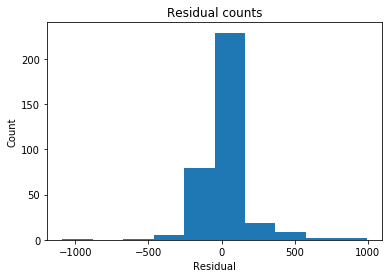

In [46]:
plt.hist(residual_10)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

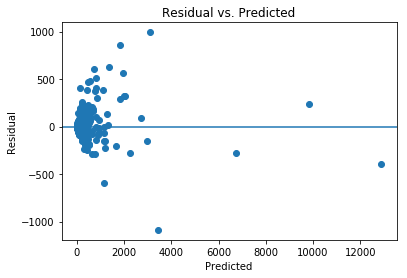

In [47]:
plt.scatter(ypred_10, residual_10)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Model

In [48]:
X_11 = NY[['Larceny', 'Population']] 
y = NY['Property crime']

In [49]:
est = sm.OLS(y, X_11) 
estres = est.fit() 
print(estres.summary()) 
ypred_11 = estres.predict(X_11) 
print(ypred_11)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.766e+04
Date:                Fri, 29 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:36:59   Log-Likelihood:                -2118.5
No. Observations:                 347   AIC:                             4241.
Df Residuals:                     345   BIC:                             4249.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Larceny        1.5214      0.018     82.697      0.0

**Population has a negative coefficient when regressed with larceny but does not have a negative coefficient when regressed with burlgary**

## Model

In [50]:
X_12 = NY[['Robbery', 'Population']] 
y = NY['Property crime']

In [51]:
est = sm.OLS(y, X_12) 
estres = est.fit() 
print(estres.summary()) 
ypred_12 = estres.predict(X_12) 
print(ypred_12)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2206.
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          2.74e-197
Time:                        09:36:59   Log-Likelihood:                -2468.0
No. Observations:                 347   AIC:                             4940.
Df Residuals:                     345   BIC:                             4948.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Robbery        6.6112      0.267     24.759      0.0

In [52]:
actual = NY['Property crime']
residual_12 = actual - ypred_12

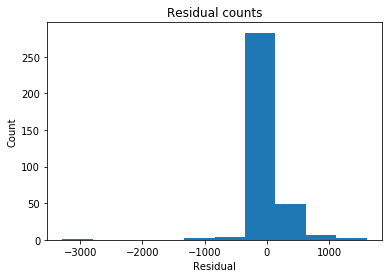

In [53]:
plt.hist(residual_12)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

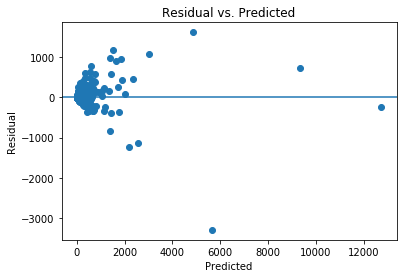

In [54]:
plt.scatter(ypred_12, residual_12)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [55]:
print(scipy.stats.shapiro(residual_10))
print(scipy.stats.shapiro(residual_12))

(0.7332791090011597, 3.2616855143330406e-23)
(0.5967795848846436, 1.2161093003803734e-27)


**Burglary and Population have the best fit.  Looking at the residuals they have the strongest t-values.  The R2 is .97 therefore this model explains 97% of variance.** 

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
from matplotlib.mlab import PCA as mlabPCA 
from sklearn.decomposition import PCA

## PCA

In [58]:
PCA_NY = NY._get_numeric_data()
PCA_NY = PCA_NY.drop('Property crime', axis=1)

XPCA = StandardScaler().fit_transform(PCA_NY)
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(XPCA)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.62923837 0.19502588 0.05400117 0.04143137 0.03380476]


In [59]:
X = StandardScaler().fit_transform(PCA_NY)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00289017  0.04739543  0.02161992  0.03171648  0.01954549  0.01630736
   0.02516214  0.02090864  0.01455322  0.02146127  0.12608848  0.0348617
   0.04739765  0.0723809   0.06631345 -0.05374081  0.07242503  0.06632662
  -0.05392512]
 [ 0.04739543  1.00289017  0.83185761  0.75858658  0.79893168  0.81788242
   0.83709394  0.82204189  0.90377058  0.83039829  0.50416543  0.34534177
   1.00289017  0.73831555  0.93056472 -0.38106809  0.73830315  0.9305637
  -0.38089331]
 [ 0.02161992  0.83185761  1.00289017  0.95812116  0.96504329  0.9971342
   0.99961454  0.97366288  0.91530697  0.99008292  0.40696648  0.1684797
   0.83185736  0.41908388  0.64323183 -0.16566775  0.41907521  0.64323015
  -0.16558895]
 [ 0.03171648  0.75858658  0.95812116  1.00289017  0.94878772  0.96607381
   0.94031459  0.95896433  0.88394107  0.96191772  0.40921439  0.13243965
   0.75858688  0.35472968  0.56716913 -0.1318129   0.35472361  0.56716882
  -0.13174986]
 [ 0.01954549  0.79893168  0.9650432

In [60]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 19).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.01594234]
 [ 0.27539631]
 [ 0.26143615]
 [ 0.24734881]
 [ 0.25773248]
 [ 0.2572285 ]
 [ 0.26213427]
 [ 0.26316025]
 [ 0.27380244]
 [ 0.26019358]
 [ 0.15816973]
 [ 0.1178335 ]
 [ 0.27539644]
 [ 0.21760093]
 [ 0.25907438]
 [-0.13687945]
 [ 0.21759971]
 [ 0.25907467]
 [-0.13683246]]
Eigenvalue 1: 11.990082552074139
----------------------------------------
Eigenvector 2: 
[[ 0.03777568]
 [ 0.00773086]
 [-0.20681044]
 [-0.22718027]
 [-0.19547038]
 [-0.21679799]
 [-0.19733701]
 [-0.18906025]
 [-0.10019392]
 [-0.20859037]
 [ 0.08467575]
 [ 0.28316447]
 [ 0.00773164]
 [ 0.33102403]
 [ 0.18324178]
 [-0.39812074]
 [ 0.33103809]
 [ 0.18324641]
 [-0.39806457]]
Eigenvalue 2: 3.7162011492372877
----------------------------------------
Eigenvector 3: 
[[ 9.39953397e-01]
 [ 1.53604205e-02]
 [-1.82436634e-02]
 [ 8.06066120e-04]
 [-2.48704907e-02]
 [-2.74427258e-02]
 [-1.12377245e-02]
 [-2.71783865e-02]
 [-2.78385801e-02]
 [-2.89257989e-02]
 [ 2.98704791e-01]
 [-3.36475865e-02]
 [ 1

Keep components with eigenvalues > 1

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


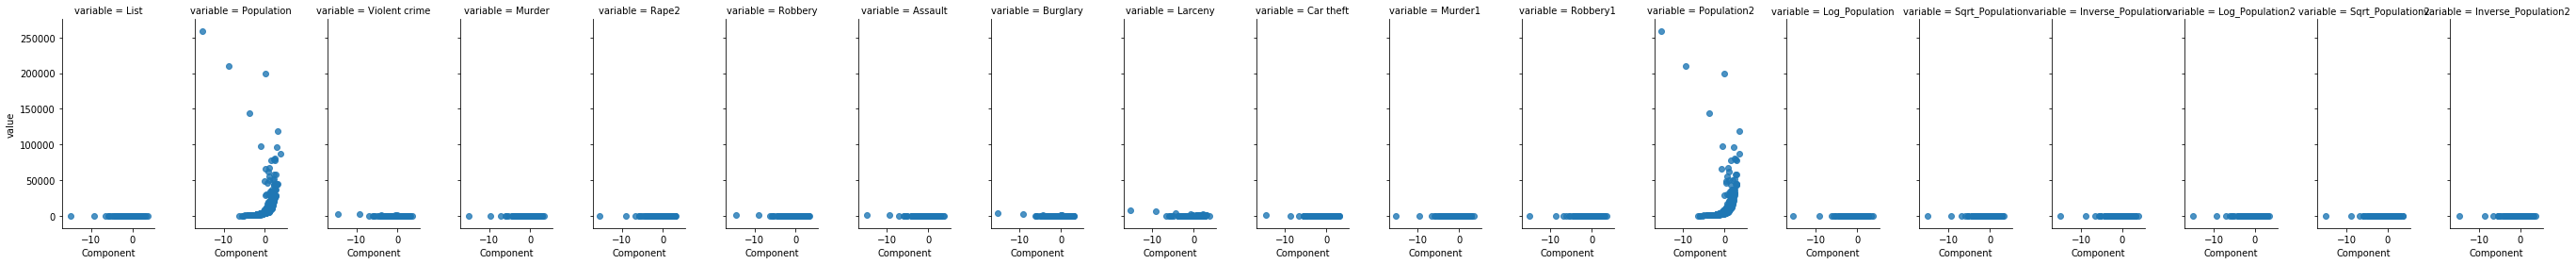

In [61]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 1]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = PCA_NY
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

Check correlations 

In [62]:
data_to_corr = PCA_NY
data_to_corr['Component'] = Y

In [63]:
data_to_corr.corr()

,List,Population,Violent crime,Murder,Rape2,Robbery,Assault,Burglary,Larceny,Car theft,Murder1,Robbery1,Population2,Log_Population,Sqrt_Population,Inverse_Population,Log_Population2,Sqrt_Population2,Inverse_Population2,Component
List,1.000,0.047,0.022,0.032,0.019,0.016,0.025,0.021,0.015,0.021,0.126,0.035,0.047,0.072,0.066,-0.054,0.072,0.066,-0.054,0.073
Population,0.047,1.000,0.829,0.756,0.797,0.816,0.835,0.820,0.901,0.828,0.503,0.344,1.000,0.736,0.928,-0.380,0.736,0.928,-0.380,0.015
Violent crime,0.022,0.829,1.000,0.955,0.962,0.994,0.997,0.971,0.913,0.987,0.406,0.168,0.829,0.418,0.641,-0.165,0.418,0.641,-0.165,-0.398
Murder,0.032,0.756,0.955,1.000,0.946,0.963,0.938,0.956,0.881,0.959,0.408,0.132,0.756,0.354,0.566,-0.131,0.354,0.566,-0.131,-0.437
Rape2,0.019,0.797,0.962,0.946,1.000,0.949,0.958,0.974,0.921,0.960,0.403,0.189,0.797,0.424,0.628,-0.182,0.424,0.628,-0.182,-0.376
Robbery,0.016,0.816,0.994,0.963,0.949,1.000,0.983,0.964,0.898,0.989,0.378,0.154,0.816,0.394,0.619,-0.150,0.394,0.619,-0.150,-0.417
Assault,0.025,0.835,0.997,0.938,0.958,0.983,1.000,0.964,0.913,0.977,0.422,0.176,0.835,0.432,0.653,-0.174,0.432,0.653,-0.174,-0.380
Burglary,0.021,0.820,0.971,0.956,0.974,0.964,0.964,1.000,0.950,0.976,0.402,0.197,0.820,0.449,0.656,-0.194,0.449,0.656,-0.193,-0.364
Larceny,0.015,0.901,0.913,0.881,0.921,0.898,0.913,0.950,1.000,0.916,0.458,0.297,0.901,0.590,0.788,-0.284,0.590,0.788,-0.284,-0.193
Car theft,0.021,0.828,0.987,0.959,0.960,0.989,0.977,0.976,0.916,1.000,0.368,0.164,0.828,0.414,0.638,-0.163,0.414,0.638,-0.163,-0.402


In [64]:
eig_vec_cov[:, 0:3]

array([[ 1.59423427e-02,  3.77756771e-02,  9.39953397e-01],
       [ 2.75396310e-01,  7.73086142e-03,  1.53604205e-02],
       [ 2.61436152e-01, -2.06810444e-01, -1.82436634e-02],
       [ 2.47348812e-01, -2.27180266e-01,  8.06066120e-04],
       [ 2.57732476e-01, -1.95470377e-01, -2.48704907e-02],
       [ 2.57228504e-01, -2.16797994e-01, -2.74427258e-02],
       [ 2.62134273e-01, -1.97337009e-01, -1.12377245e-02],
       [ 2.63160247e-01, -1.89060248e-01, -2.71783865e-02],
       [ 2.73802442e-01, -1.00193924e-01, -2.78385801e-02],
       [ 2.60193585e-01, -2.08590366e-01, -2.89257989e-02],
       [ 1.58169725e-01,  8.46757545e-02,  2.98704791e-01],
       [ 1.17833503e-01,  2.83164468e-01, -3.36475865e-02],
       [ 2.75396437e-01,  7.73164462e-03,  1.53621917e-02],
       [ 2.17600931e-01,  3.31024031e-01, -1.31465438e-02],
       [ 2.59074376e-01,  1.83241781e-01,  1.91334345e-02],
       [-1.36879447e-01, -3.98120744e-01,  1.01066602e-01],
       [ 2.17599711e-01,  3.31038090e-01

In [65]:
data_to_plot.columns

Index(['Component', 'variable', 'value'], dtype='object')

## Test model (burglary and population) using holdout method

In [66]:
data = NY[['Burglary', 'Population']] 
target = NY['Property crime']

In [67]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)


In [68]:
est = sm.OLS(y_train, X_train) 
estres = est.fit() 
print(estres.summary()) 
ypred_holdout = estres.predict(X_test) 
print(ypred_holdout)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     7598.
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          2.23e-241
Time:                        09:37:02   Log-Likelihood:                -1795.5
No. Observations:                 277   AIC:                             3595.
Df Residuals:                     275   BIC:                             3602.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       3.0126      0.058     52.332      0.0

In [69]:
holdout_residual = y_test - ypred_holdout

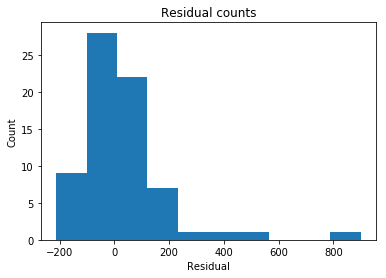

In [70]:
plt.hist(holdout_residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

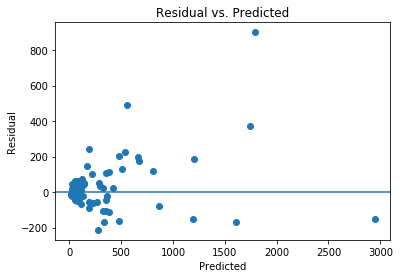

In [71]:
plt.scatter(ypred_holdout, holdout_residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

**The test has strong and consistant R2 at .98, similar to the sampe - and the model is statistically significant**

## Test model (burglary and population) using cross validation

In [72]:
regr = linear_model.LinearRegression()

In [73]:
from sklearn.model_selection import cross_val_score


In [74]:
scores = cross_val_score(regr, X_10, y, cv=6)
print("Cross_validated_scores:", scores)

Cross_validated_scores: [0.98264698 0.8481393  0.91094594 0.93098819 0.98921841 0.93625199]


**model with Burlglary and Population have crossvalidation scores that are consistant**

## Testing the model (burglary) with crime data from NJ

In [77]:
df_1 = pd.read_excel('Jersey_Crime.xls', header=4, skipfooter=3)
df_1.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Aberdeen Township,18150,19,0,nan,0,13,6,237,42,185,10,0
1,Absecon,8380,21,0,nan,2,4,15,266,91,169,6,0
2,Allendale,6712,0,0,nan,0,0,0,37,6,29,2,0
3,Allenhurst,493,0,0,nan,0,0,0,39,20,18,1,0
4,Allentown,1812,3,0,nan,0,0,3,18,12,6,0,0


In [78]:
df_1.columns = ['City', 'Population', 'Violent crime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Assault', 'Property crime', 'Burglary', 'Larceny', 'Car theft', 'Arson']

In [79]:
df_1.head()

,City,Population,Violent crime,Murder,Rape1,Rape2,Robbery,Assault,Property crime,Burglary,Larceny,Car theft,Arson
0,Aberdeen Township,18150,19,0,nan,0,13,6,237,42,185,10,0
1,Absecon,8380,21,0,nan,2,4,15,266,91,169,6,0
2,Allendale,6712,0,0,nan,0,0,0,37,6,29,2,0
3,Allenhurst,493,0,0,nan,0,0,0,39,20,18,1,0
4,Allentown,1812,3,0,nan,0,0,3,18,12,6,0,0


In [80]:
NJ = pd.DataFrame(df)

In [81]:
NJ.isnull().sum()

List                0
City                0
Population          0
Violent crime       0
Murder              0
Rape1             348
Rape2               0
Robbery             0
Assault             0
Property crime      0
Burglary            0
Larceny             0
Car theft           0
Arson             161
dtype: int64

In [82]:
data_1 = NJ[['Burglary', 'Population']] 
target_1 = NJ['Property crime']

In [83]:
X_current_data, X_other_year, y_current_data, y_other_year = train_test_split(data_1, target_1, test_size=0.2, random_state=20)

In [84]:
est = sm.OLS(y_current_data, X_current_data) 
estres = est.fit() 
print(estres.summary()) 
ypred_holdout_1 = estres.predict(X_other_year) 
print(ypred_holdout_1)


                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     6904.
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          2.10e-236
Time:                        09:38:40   Log-Likelihood:                -1801.4
No. Observations:                 278   AIC:                             3607.
Df Residuals:                     276   BIC:                             3614.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       3.0340      0.059     51.250      0.0

In [85]:
holdout_residual_1 = y_other_year - ypred_holdout_1

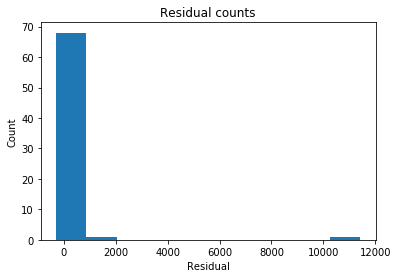

In [86]:
plt.hist(holdout_residual_1)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

**The test has strong and consistant R2 at .98 - similar to the sample - and the model is statistically significant**

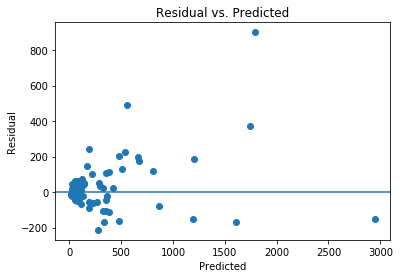

In [87]:
plt.scatter(ypred_holdout, holdout_residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Testing the model (burglary) with crime data from Illinois 

In [88]:
df_2 = pd.read_excel('illinois_crime.xls', header=4, skipfooter=3)
df_2.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Addison,37378.000,40.000,1.000,nan,8.000,5.000,26.000,640.000,97.000,527.000,16.000,5.000
1,Albany,878.000,0.000,0.000,nan,0.000,0.000,0.000,5.000,0.000,5.000,0.000,0.000
2,Albers,1187.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Albion,1975.000,0.000,0.000,nan,0.000,0.000,0.000,33.000,8.000,22.000,3.000,1.000
4,Algonquin,29980.000,18.000,0.000,nan,3.000,2.000,13.000,519.000,33.000,475.000,11.000,6.000


In [89]:
df_2.columns = ['City', 'Population', 'Violent crime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Assault', 'Property crime', 'Burglary', 'Larceny', 'Car theft', 'Arson']

In [90]:
Il = pd.DataFrame(df)

In [91]:
data_2 = Il[['Burglary', 'Population']] 
target_2 = Il['Property crime']

In [92]:
X_current_data_1, X_other_year_1, y_current_data_1, y_other_year_1 = train_test_split(data_2, target_2, test_size=0.2, random_state=20)

In [93]:
est = sm.OLS(y_current_data_1, X_current_data_1) 
estres = est.fit() 
print(estres.summary()) 
ypred_holdout_2 = estres.predict(X_other_year_1) 
print(ypred_holdout_2)



                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     6904.
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          2.10e-236
Time:                        09:38:42   Log-Likelihood:                -1801.4
No. Observations:                 278   AIC:                             3607.
Df Residuals:                     276   BIC:                             3614.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Burglary       3.0340      0.059     51.250      0.0

In [94]:
holdout_residual_2 = y_other_year_1 - ypred_holdout_2

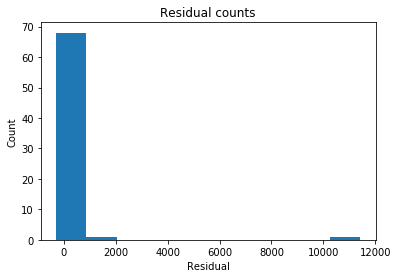

In [95]:
plt.hist(holdout_residual_2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

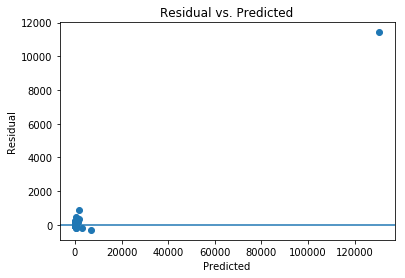

In [96]:
plt.scatter(ypred_holdout_2, holdout_residual_2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

**The test has strong and consistant R2 at .98 and the model is statistically significant**

## Revised Model (Robbery, Population) tested using holdout

In [97]:
data_3 = NY[['Robbery', 'Population']] 
target_3 = NY['Property crime']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(data_3, target_3, test_size=0.2, random_state=20)

In [99]:
est = sm.OLS(y_train, X_train) 
estres = est.fit() 
print(estres.summary()) 
ypred_holdout = estres.predict(X_test) 
print(ypred_holdout)

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1924.
Date:                Fri, 29 Mar 2019   Prob (F-statistic):          2.01e-162
Time:                        09:38:42   Log-Likelihood:                -1978.6
No. Observations:                 277   AIC:                             3961.
Df Residuals:                     275   BIC:                             3969.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Robbery        6.8550      0.298     22.985      0.0

**The R2 is consisent with the sample and the model is statistically significant**

## Revised model (Robbery) testing using crossvalidation

In [100]:
scores = cross_val_score(regr, X_12, y, cv=6)
print("Cross_validated_scores:", scores)

Cross_validated_scores: [0.96893249 0.76985808 0.66389505 0.70140163 0.96840476 0.69177553]


**Cross-validated scores for Robbery are not consistent.   The crossvalidated scores for the model with Burglary is more consistent than with Robbery**

## Conclusion:  The best model appears to be Burglary and Population.  The crossvalidated scores are consistent and the model is statistically significant.  It is the most robust model.